## 전국지도에 block map으로 표시하기
- chicken 지역별(시도+구군) 가맹점

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
filename = 'chicken_data/pericana_table.csv'
pericana_table = pd.read_csv(filename, encoding='CP949', index_col=0, header=0)
pericana = pericana_table.apply(lambda r:r['sido']+' '+r['gungu'],axis=1).value_counts()
pericana.head()

경기도 수원시     31
강원도 원주시     27
충청남도 천안시    26
경기도 부천시     25
경기도 화성시     21
dtype: int64

In [4]:
filename = 'chicken_data/kyochon_table.csv'
kyochon_table = pd.read_csv(filename, encoding='CP949', index_col=0, header=0)
kyochon = pericana_table.apply(lambda r:r['sido']+' '+r['gungu'],axis=1).value_counts()
kyochon.head()

경기도 수원시     31
강원도 원주시     27
충청남도 천안시    26
경기도 부천시     25
경기도 화성시     21
dtype: int64

In [5]:
filename = 'chicken_data/cheogajip_table.csv'
cheogajip_table = pd.read_csv(filename, encoding='CP949', index_col=0, header=0)
cheogajip = cheogajip_table.apply(lambda r:r['sido']+' '+r['gungu'],axis=1).value_counts()
cheogajip.head()

경상남도 김해시    21
충청북도 청주시    20
충청남도 천안시    20
경기도 화성시     19
경기도 수원시     17
dtype: int64

In [6]:
filename = 'chicken_data/goobne_table.csv'
goobne_table = pd.read_csv(filename, encoding='CP949', index_col=0, header=0)
goobne = goobne_table.apply(lambda r:r['sido']+' '+r['gungu'],axis=1).value_counts()
goobne.head()

경상남도 창원시    25
경기도 수원시     20
경기도 고양시     19
충청북도 청주시    18
경기도 성남시     16
dtype: int64

In [7]:
chiken_table = pd.DataFrame({'pericana':pericana, 'kyochon':kyochon, 'cheogajip':cheogajip, 'goobne':goobne}).fillna(0)
chiken_table.head()

,pericana,kyochon,cheogajip,goobne
강원도 강릉시,14.0,14.0,2.0,6.0
강원도 고성군,3.0,3.0,2.0,2.0
강원도 동해시,6.0,6.0,2.0,2.0
강원도 삼척시,2.0,2.0,5.0,1.0
강원도 속초시,4.0,4.0,4.0,2.0


In [8]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

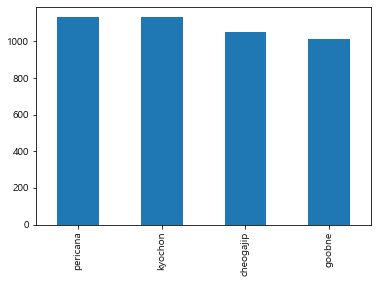

In [9]:
chiken_table.sum(axis=0).iloc[:6].plot(kind='bar')
plt.show()

### Block Map
- data_draw_korea.csv

In [10]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.index = data_draw_korea.apply(lambda r: r['광역시도']+' '+r['행정구역'], axis=1)
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [11]:
chicken = pd.merge(data_draw_korea, chiken_table, how='outer', left_index=True, right_index=True)
chicken = chicken[~np.isnan(chicken['면적'])].fillna(0)
chicken['total'] = chiken_table.sum(axis=1)
chicken.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,pericana,kyochon,cheogajip,goobne,total
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,14.0,14.0,2.0,6.0,36.0
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,3.0,3.0,2.0,2.0,10.0
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,6.0,6.0,2.0,2.0,16.0
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,2.0,2.0,5.0,1.0,10.0
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,4.0,4.0,4.0,2.0,14.0


In [12]:
def showMap(blockedMap, targetData, strTitle, strColor, gamma):
    BORDER_LINES = [
       [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
       [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), 
                                 (9,5), (10,5), (10,4), (5,4)], # 서울
       [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), 
                                 (12, 5), (12,4), (11,4), (11,3)], # 경기도
       [(8,10), (8,11), (6,11), (6,12)], # 강원도
       [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충청북도
       [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
        (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
       [(13,5), (13,6), (16,6)], [(13,5), (14,5)], # 대전시 #세종시
       [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
       [(20,5), (21,5), (21,6), (23,6)], #전라남도
       [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
       [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
       [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
       [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
       [(16,11), (16,13)], [(27,5), (27,6), (25,6)],
    ]
    
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                     min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    cmapname = strColor
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData]>whitelabelmin else 'black'
        dispname = row['shortName']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(targetData)

    plt.tight_layout()
    plt.savefig('chicken_data/' + targetData +'.png')
    plt.show()

In [13]:
import math
import numpy as np

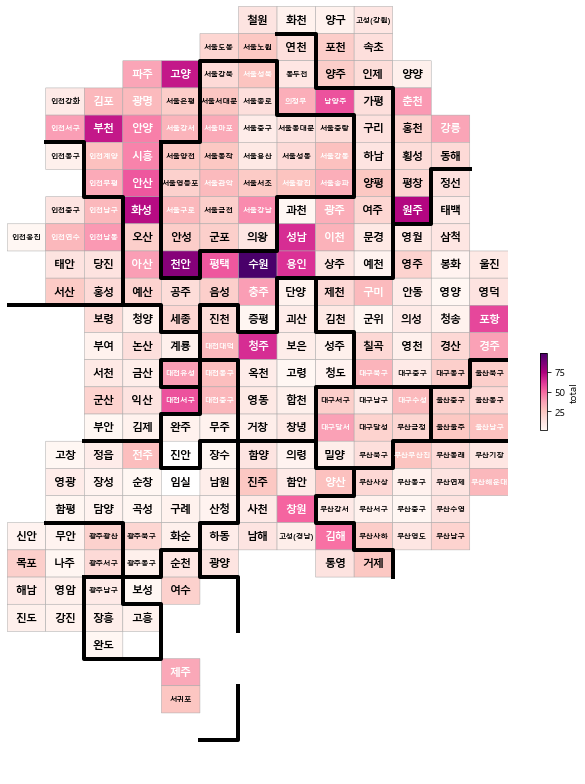

In [14]:
showMap(chicken, 'total', '4개 chicken 프랜차이즈 분포','RdPu', 0.75)

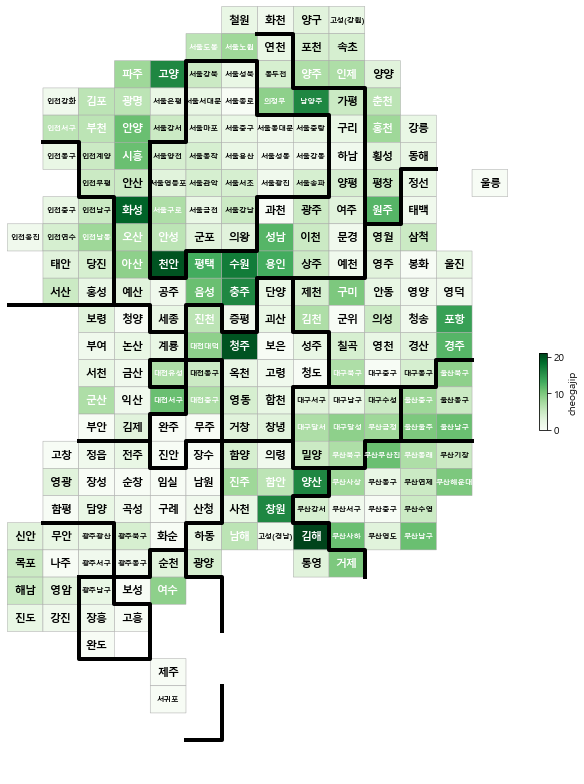

In [15]:
showMap(chicken, 'cheogajip', '처갓집양념통닭 매장 분포','Greens', 0.75)

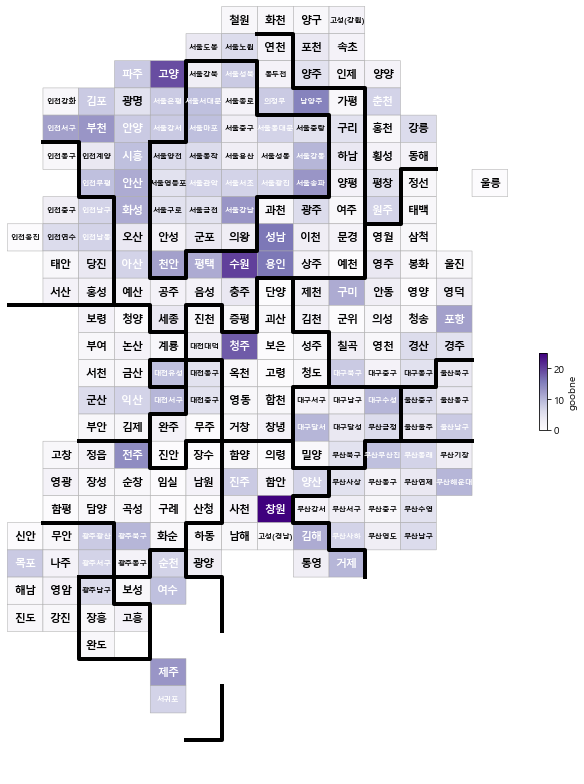

In [16]:
showMap(chicken, 'goobne', '굽네치킨 매장 분포','Purples', 0.75)

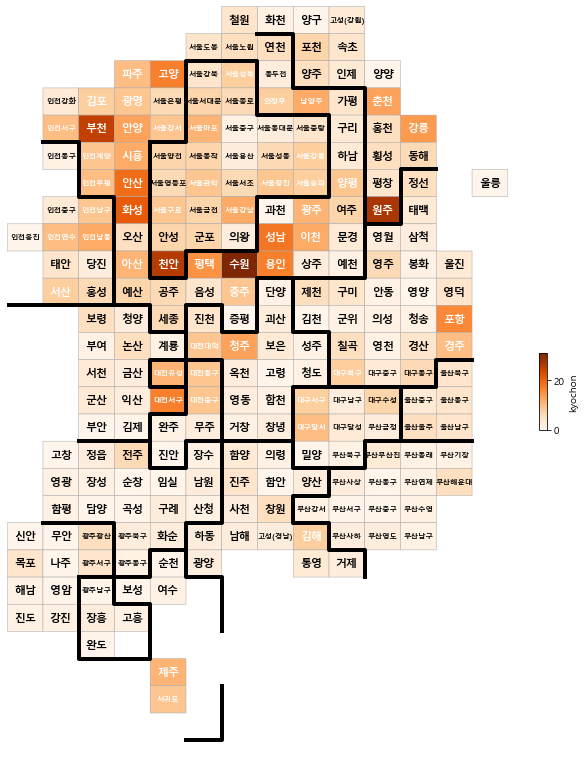

In [17]:
showMap(chicken, 'kyochon', '교촌치킨 매장 분포','Oranges', 0.75)

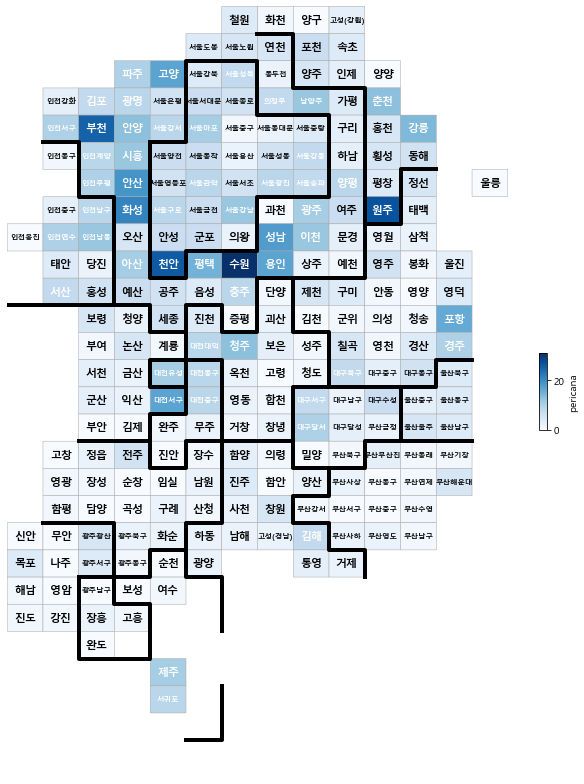

In [18]:
showMap(chicken, 'pericana', '페리카나 매장 분포','Blues', 0.75)

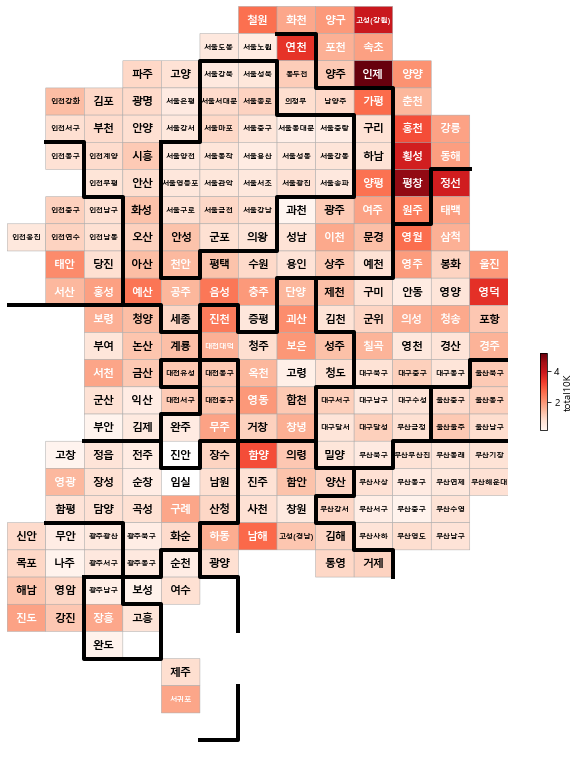

In [19]:
chicken['total10K'] = chicken['total']/chicken['인구수']*10000
showMap(chicken, 'total10K', '인구만명당 치킨집 수','Reds', 0.75)

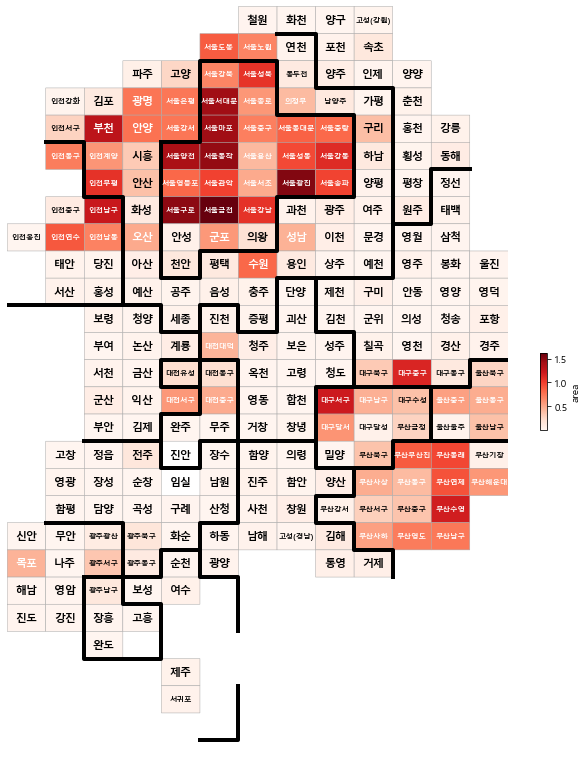

In [20]:
chicken['area'] = chicken['total']/chicken['면적']
showMap(chicken, 'area', '면적당 치킨집 수','Reds', 0.75)